In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Box filter+downsampling on input
def boxDownsample(img):
    box = np.array([[1,1,1],[1,1,1],[1,1,1]])*(1/9)
    box_img = convolve2d(img, box, mode = "same")
    return cv2.resize(box_img, (0,0), fx=0.5, fy=0.5, interpolation=cv2.INTER_NEAREST)

# Gaussian filter+downsampling on input
def gaussianDownsample(img):
    gaussianK = cv2.getGaussianKernel(5, 0)
    g_img = convolve2d(img, gaussianK, mode = "same")
    return cv2.resize(g_img, (0,0), fx=0.5, fy=0.5, interpolation=cv2.INTER_NEAREST)

# return Gaussian Pyramid as an array of images (large -> small)
def gaussianPyramid(img, pyrDim):
    GP = [img]
    for i in range(pyrDim):
        if (i == 0):
            tempLayer = gaussianDownsample(img)
        else:
            tempLayer = gaussianDownsample(tempLayer)
        GP.append(tempLayer)
    return GP

# return Laplacian Pyramid as an array of images (small -> large)
def laplacianPyramid(img, pyrDim):
    gaussianK = cv2.getGaussianKernel(5, 0)
    newlayer = img
    LP = []
    for i in range(pyrDim):
        if (i == pyrDim-1):
            templayer = gaussianDownsample(oldlayer)
        else:
            oldlayer = convolve2d(newlayer, gaussianK, mode = "same")
            # residual: difference before downsampling
            templayer = newlayer - oldlayer
            newlayer = cv2.resize(oldlayer, (0,0), fx=0.5, fy=0.5, interpolation=cv2.INTER_NEAREST)
        LP.append(templayer)
    return LP

In [2]:
img = cv2.imread('../13.original.png', 0)
pyrDim = 3

# Naive downsampling
downsample = cv2.resize(img, (0,0), fx=0.5, fy=0.5, interpolation=cv2.INTER_NEAREST)
# Box downsampling
box_down = boxDownsample(img)
# Gaussian Pyramid
gPyramid = gaussianPyramid(img, pyrDim)
# Laplacian Pyramid
lPyramid = laplacianPyramid(img, pyrDim)

# Save images
cv2.imwrite('../13.sample.jpg', downsample)
cv2.imwrite('../13.box.jpg', box_down)
for i in range(pyrDim):
    cv2.imwrite('../13.Gaussian'+str(i+1)+'.jpg', gPyramid[i+1])
    cv2.imwrite('../13.Laplacian'+str(i+1)+'.jpg', lPyramid[i])

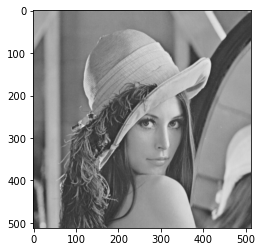

In [4]:
# Original image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

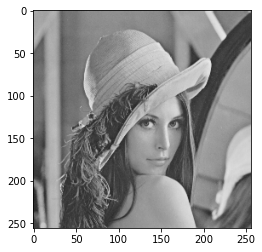

In [5]:
# Naive downsample image
plt.imshow(cv2.cvtColor(downsample, cv2.COLOR_BGR2RGB))

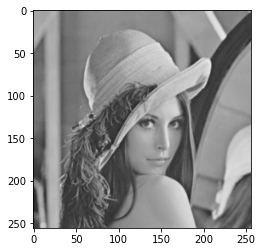

In [38]:
# Box downsample image
plt.imshow(box_down)

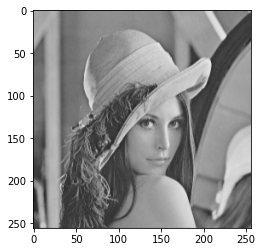

In [35]:
# Gaussian Pyramid
plt.imshow(cv2.cvtColor(gPyramid[1], cv2.COLOR_BGR2RGB))

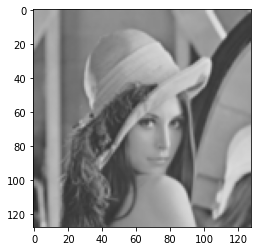

In [16]:
plt.imshow(cv2.cvtColor(gPyramid[2], cv2.COLOR_BGR2RGB))

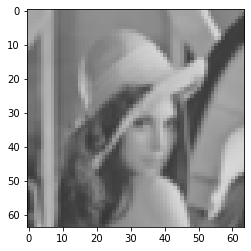

In [17]:
plt.imshow(cv2.cvtColor(gPyramid[3], cv2.COLOR_BGR2RGB))

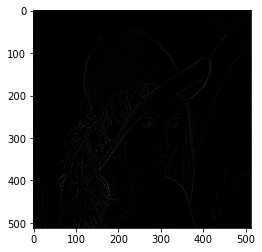

In [18]:
# Laplacian Pyramid
plt.imshow(cv2.cvtColor(lPyramid[0], cv2.COLOR_BGR2RGB))

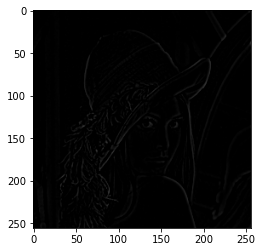

In [19]:
plt.imshow(cv2.cvtColor(lPyramid[1], cv2.COLOR_BGR2RGB))

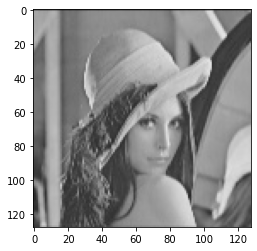

In [36]:
plt.imshow(cv2.cvtColor(lPyramid[2], cv2.COLOR_BGR2RGB))